# CUSTOMER RETENTION

Problem Statement

Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import chi2_contingency, chi2
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_excel(r'/Users/pratiksingh/Downloads/Customer_retention_dataset/customer_retention_dataset.xlsx')

In [18]:
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [22]:
df.head().T

,0,1,2,3,4
1Gender of respondent,Male,Female,Female,Male,Female
2 How old are you?,31-40 years,21-30 years,21-30 years,21-30 years,21-30 years
3 Which city do you shop online from?,Delhi,Delhi,Greater Noida,Karnal,Bangalore
4 What is the Pin Code of where you shop online from?,110009,110030,201308,132001,530068
5 Since How Long You are Shopping Online ?,Above 4 years,Above 4 years,3-4 years,3-4 years,2-3 years
...,...,...,...,...,...
Longer delivery period,Paytm.com,Snapdeal.com,Paytm.com,Paytm.com,Paytm.com
Change in website/Application design,Flipkart.com,Amazon.in,Paytm.com,"Amazon.in, Flipkart.com",Amazon.in
Frequent disruption when moving from one page to another,Amazon.in,Myntra.com,Paytm.com,"Amazon.in, Flipkart.com",Snapdeal.com
Website is as efficient as before,Amazon.in,"Amazon.in, Flipkart.com",Amazon.in,"Amazon.in, Flipkart.com, Paytm.com",Paytm.com


In [24]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [25]:
df = df.rename(columns = {'1Gender of respondent' :'Gender',
                          '2 How old are you? ': 'Age',
                          '3 Which city do you shop online from?' : 'City',
                          '4 What is the Pin Code of where you shop online from?': 'Pincode',
                          '5 Since How Long You are Shopping Online ?' :'Shopping_Since',
                          '6 How many times you have made an online purchase in the past 1 year?' :'Frequency',
                          '7 How do you access the internet while shopping on-line?' :'internet_Accesibility',
                          '8 Which device do you use to access the online shopping?' :'device_used',
    
                          })

df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ',
       '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ',
       '15 What is your preferred payment Option?\

In [26]:
df.columns = df.columns.str.replace(' ', '')

In [27]:
df.columns = df.columns.str.replace('\t', '')

In [28]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used',
       '9Whatisthescreensizeofyourmobiledevice?',
       '10Whatistheoperatingsystem(OS)ofyourdevice?',
       '11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?',
       '12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?',
       '13Afterfirstvisit,howdoyoureachtheonlineretailstore?',
       '14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?',
       '15WhatisyourpreferredpaymentOption?',
       '16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?',
       '17Whydidyouabandonthe“Bag”,“ShoppingCart”?',
       '18Thecontentonthewebsitemustbeeasytoreadandunderstand',
       '19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison',
       '20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.',
       '21Allrelevantinfor

In [29]:
df = df.rename(columns ={'9Whatisthescreensizeofyourmobiledevice?' : 'Screen_Size',
                         '10Whatistheoperatingsystem(OS)ofyourdevice?':'OS',
                         '11Whatbrowserdoyourunonyourdevicetoaccessthewebsite?':'browser',
                         '12Whichchanneldidyoufollowtoarriveatyourfavoriteonlinestoreforthefirsttime?':'channel',
                         '13Afterfirstvisit,howdoyoureachtheonlineretailstore?':'method',
                         '14Howmuchtimedoyouexplorethee-retailstorebeforemakingapurchasedecision?':'explore_time',
                         '15WhatisyourpreferredpaymentOption':'Preferred_pay_option',
                         '16How4doyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?':'abandon_frequency',
                         '17Whydidyouabandonthe“Bag”,“ShoppingCart”?':'reason_for_abandon',
                         '18Thecontentonthewebsitemustbeeasytoreadandunderstand':'interpretability_poll',
                         '19Informationonsimilarproducttotheonehighlightedisimportantforproductcomparison':'similar_prod_info_poll',
                         '20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision':'Seller_Product_info_poll',
                         '21Allrelevantinformationonlistedproductsmustbestatedclearly' :'product_information_poll',
                         '22Easeofnavigationinwebsite':'navigation_ease_poll',
                         '23Loadingandprocessingspeed':'speed_poll',
                         '24UserfriendlyInterfaceofthewebsite': 'interface_poll',
                         '25ConvenientPaymentmethods' :'Paymentmethods_poll',
                         '26Trustthattheonlineretailstorewillfulfillitspartofthetransactionatthestipulatedtime':'timely_fullfill_trust_poll',
                         '27Empathy(readinesstoassistwithqueries)towardsthecustomers':'Response_poll',
                         '28Beingabletoguaranteetheprivacyofthecustomer':'Customer_Privacy_poll',
                         '29Responsiveness,availabilityofseveralcommunicationchannels(email,onlinerep,twitter,phoneetc.)':'Responsivness_poll',
                         '30Onlineshoppinggivesmonetarybenefitanddiscounts' :'benefits_poll',
                         '31Enjoymentisderivedfromshoppingonline':'Enjoyment_poll',
                         '32Shoppingonlineisconvenientandflexible' : 'Convenience_poll',
                         '33Returnandreplacementpolicyofthee-tailerisimportantforpurchasedecision': "Repalcement_policy_poll",
                         '34Gainingaccesstoloyaltyprogramsisabenefitofshoppingonline' : 'Loyality_programs_poll',
                         '35DisplayingqualityInformationonthewebsiteimprovessatisfactionofcustomers':'Quality_inf_poll',
                         '36Userderivesatisfactionwhileshoppingonagoodqualitywebsiteorapplication': 'Satisfaction_poll',
                         '37NetBenefitderivedfromshoppingonlinecanleadtouserssatisfaction' : 'NetBenefit_poll',
                         '38Usersatisfactioncannotexistwithouttrust': 'User_Trust_poll',
                         '39Offeringawidevarietyoflistedproductinseveralcategory':'wide_variety_poll',
                         '40Provisionofcompleteandrelevantproductinformation':'Relevant_Product_Info_poll',
                         '41Monetarysavings':'monetary_savings_poll',
                         '42TheConvenienceofpatronizingtheonlineretailer':'patronizing_poll',
                         '43Shoppingonthewebsitegivesyouthesenseofadventure':'adventure_sense_poll',
                         '44Shoppingonyourpreferrede-tailerenhancesyoursocialstatus':'social_status_poll',
                         '45Youfeelgratificationshoppingonyourfavoritee':'gratification_poll',
                         '46Shoppingonthewebsitehelpsyoufulfillcertainroles':'role_poll',
                         '47Gettingvalueformoneyspent' : 'value_for_money_poll',
                         'Fromthefollowing,tickany(orall)oftheonlineretailersyouhaveshoppedfrom;':'Shopped_From',
                         'Easytousewebsiteorapplication':'Easy_Web_App',
                         'Visualappealingweb-pagelayout':'Appealing_pagelayout',
                         'Wildvarietyofproductonoffer':'Product_Variety_offer',
                         'Complete,relevantdescriptioninformationofproducts':'Complete_Product_Info',
                         'Fastloadingwebsitespeedofwebsiteandapplication':'fast_website',
                         'Reliabilityofthewebsiteorapplication':'realiable_website',
                         'Quicknesstocompletepurchase': 'quick_purchase',
                         'Availabilityofseveralpaymentoptions':'payment_options',
                         'Speedyorderdelivery' :'Fast_Delivery',
                         'Privacyofcustomers’information':'Privacyofcustomers_info',
                         'Securityofcustomerfinancialinformation':'Financial_Security_Info',
                         'PerceivedTrustworthiness': 'PerceivedTrust_worthiness',
                         'Presenceofonlineassistancethroughmulti-channel': 'multichannel_assistance',
                         'Longertimetogetloggedin(promotion,salesperiod)': 'Long_Login_Time',
                         'Longertimeindisplayinggraphicsandphotos(promotion,salesperiod)':'Long_Display_Time',
                         'Latedeclarationofprice(promotion,salesperiod)': 'Late_Price_Declare',
                         'Longerpageloadingtime(promotion,salesperiod)': 'Long_Loading_Time',
                         'Limitedmodeofpaymentonmostproducts(promotion,salesperiod)' :'limited_pmt_mode',
                         'Longerdeliveryperiod' : 'Late_delivery',
                         'Changeinwebsite/Applicationdesign' :'Website_Design_Change',
                         'Frequentdisruptionwhenmovingfromonepagetoanother':'page_disruption',
                         'Websiteisasefficientasbefore': 'efficiency_webpage',
                         'WhichoftheIndianonlineretailerwouldyourecommendtoafriend' :'recommendation'
                         
                          })

In [32]:
df.head()

,Gender,Age,City,Pincode,Shopping_Since,Frequency,internet_Accesibility,device_used,Screen_Size,OS,...,Long_Login_Time,Long_Display_Time,Late_Price_Declare,Long_Loading_Time,limited_pmt_mode,Late_delivery,Website_Design_Change,page_disruption,efficiency_webpage,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [33]:
df.columns

Index(['Gender', 'Age', 'City', 'Pincode', 'Shopping_Since', 'Frequency',
       'internet_Accesibility', 'device_used', 'Screen_Size', 'OS', 'browser',
       'channel', 'method', 'explore_time',
       '15WhatisyourpreferredpaymentOption?',
       '16Howfrequentlydoyouabandon(selectinganitemsandleavingwithoutmakingpayment)yourshoppingcart?',
       'reason_for_abandon', 'interpretability_poll', 'similar_prod_info_poll',
       '20Completeinformationonlistedsellerandproductbeingofferedisimportantforpurchasedecision.',
       'product_information_poll', 'navigation_ease_poll', 'speed_poll',
       'interface_poll', 'Paymentmethods_poll', 'timely_fullfill_trust_poll',
       'Response_poll', 'Customer_Privacy_poll', 'Responsivness_poll',
       'benefits_poll', 'Enjoyment_poll', 'Convenience_poll',
       'Repalcement_policy_poll', 'Loyality_programs_poll', 'Quality_inf_poll',
       'Satisfaction_poll', 'NetBenefit_poll', 'User_Trust_poll',
       'wide_variety_poll', 'Relevant_Product

In [34]:
print(len(df.columns))

71


VISUALIZATION


Ratio of gender in the data.


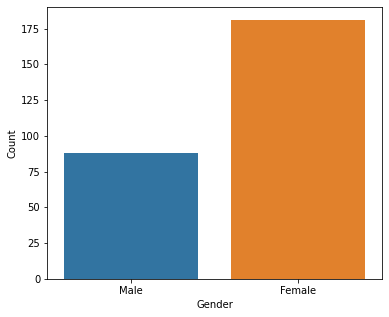

In [35]:
plt.figure(figsize = (6,5))
sns.countplot(df['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Observations:

1.Female count is more than double of male count.

2.Females shops more than males do as per the survey data.



Shopping Ratio as per cities.

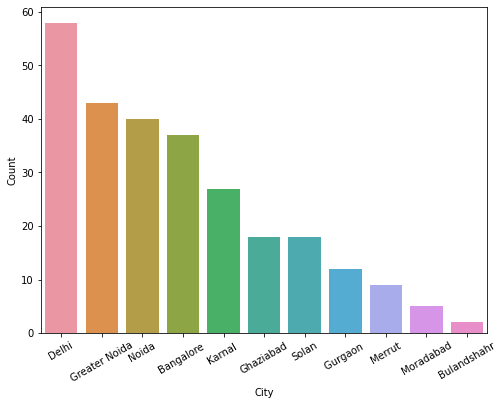

In [36]:
plt.figure(figsize = (8,6))
sns.countplot(df['City'], order = df['City'].value_counts().index)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 30);

Observations:

1.Delhi is the city from which maximum orders placed, which is due to the lifestyle of people living in the city.

2.Greater Noida, Noida, and Banglore follows in terms of online sales.

3.Least among all is Merrut, Moradabad, Bulandshire in sales as people. In these places doesn't follow fast moving lifestyle as industries and MNC's are less in these areas, Which makes people to adapt with local lifestyle than online shopping.



customers according according to Age.

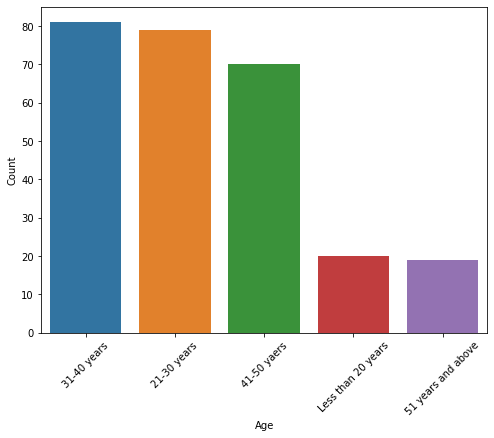

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation = 45);

Observations:

1.Highest number of customers are in range 31-40yrs.

2.However there is no great difference in sales from 21-50yrs, As this age range is the earning class and shops more.

3.Lowest number of customers are in the age range less than 20 and greater than 51yrs. Former category is majorly students and later is retired.



Time Taken for Online purchase.

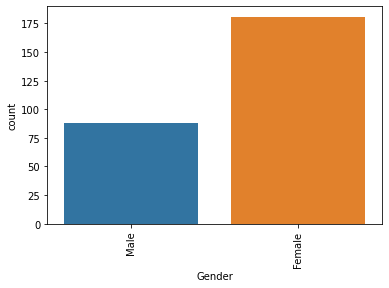

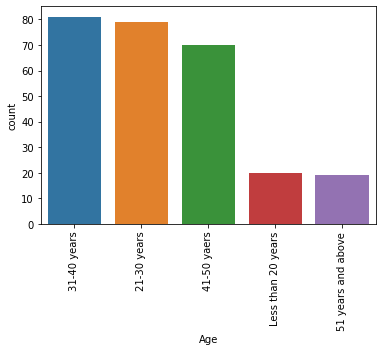

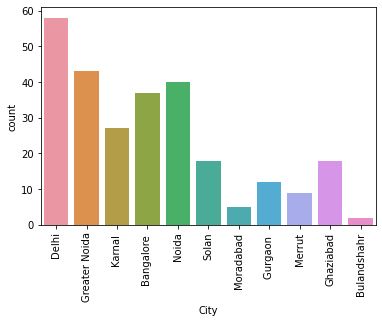

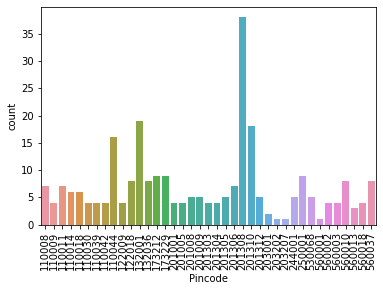

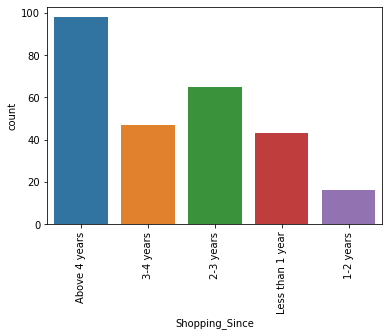

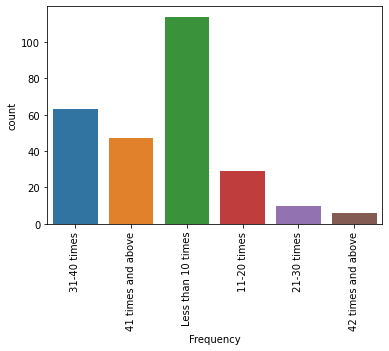

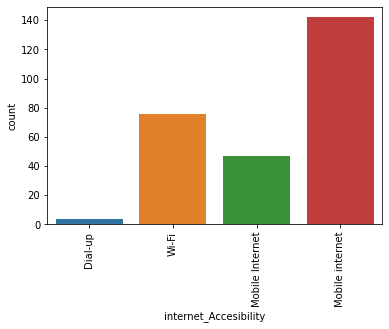

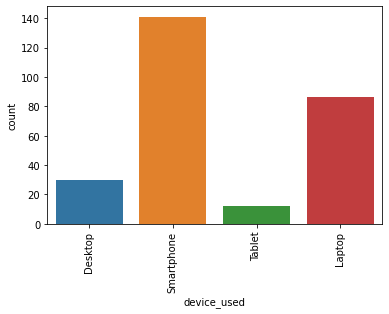

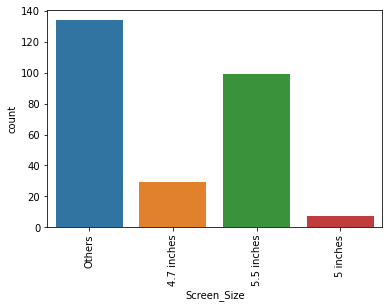

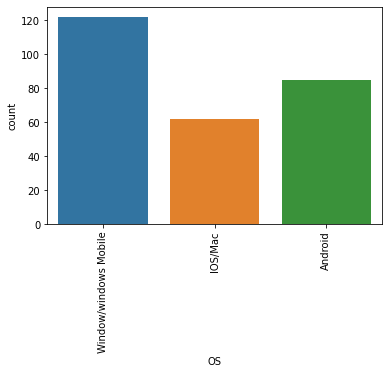

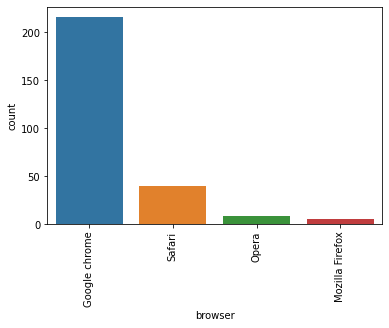

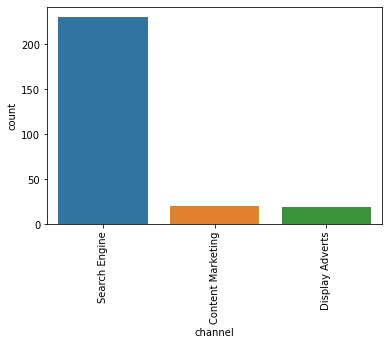

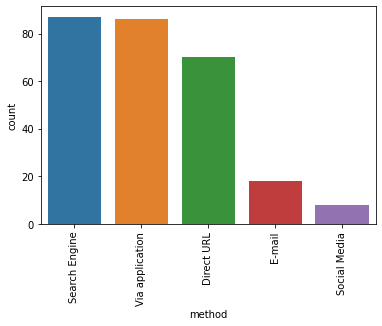

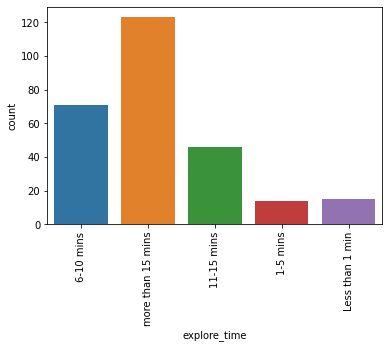

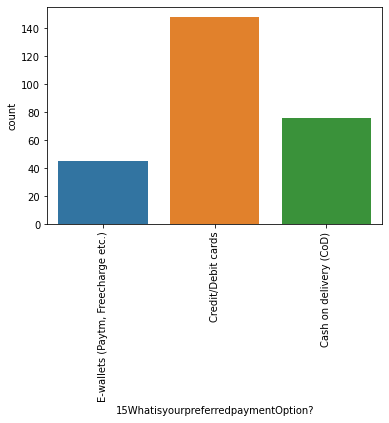

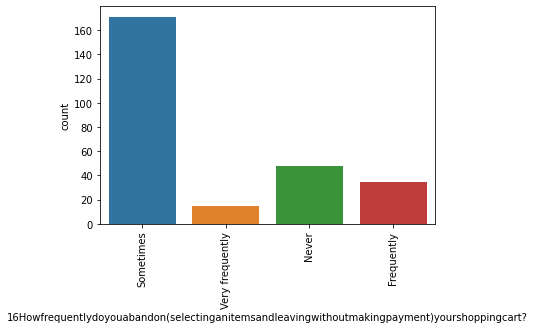

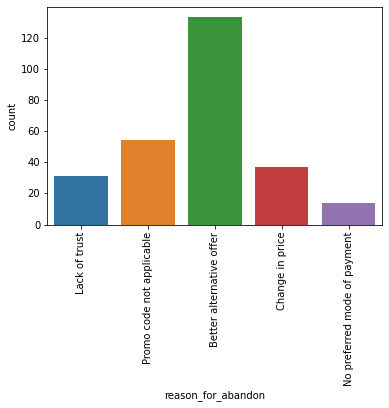

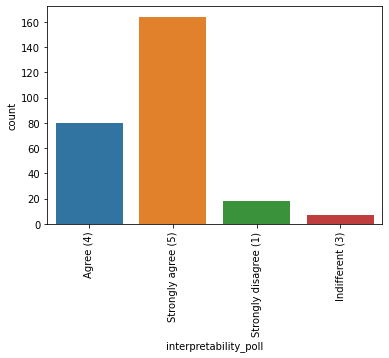

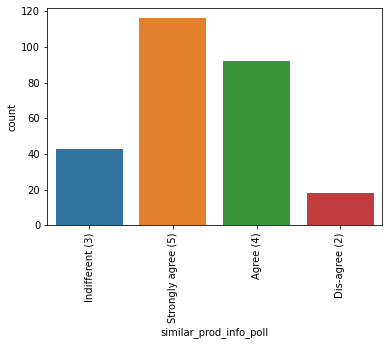

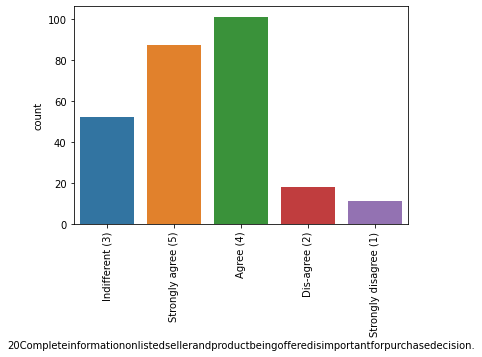

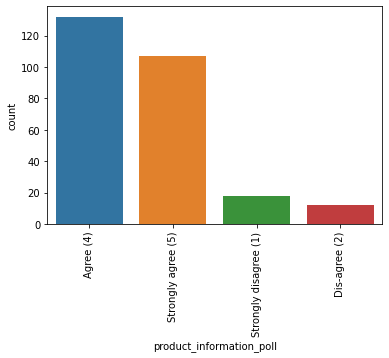

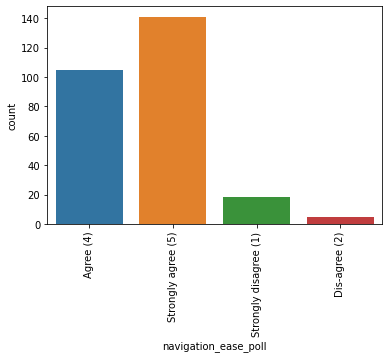

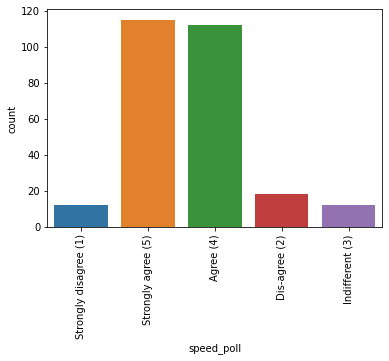

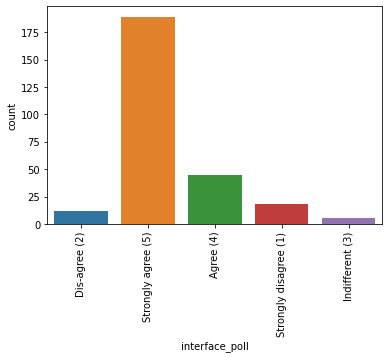

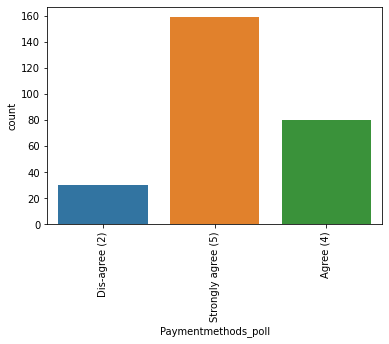

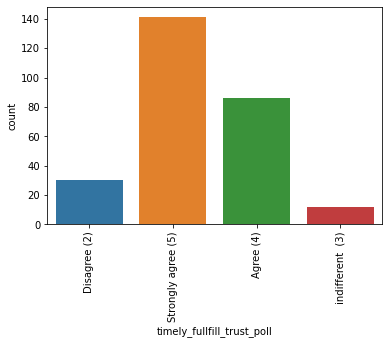

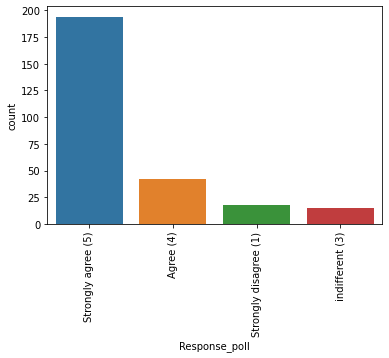

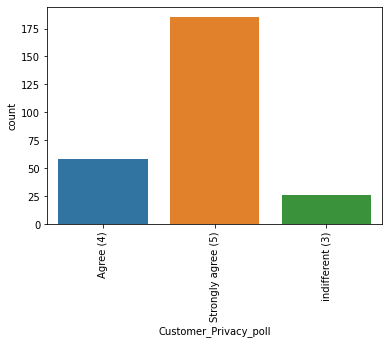

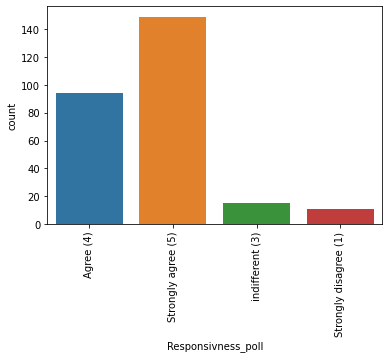

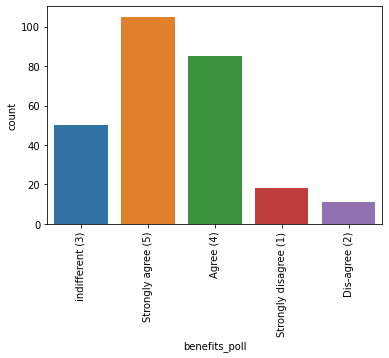

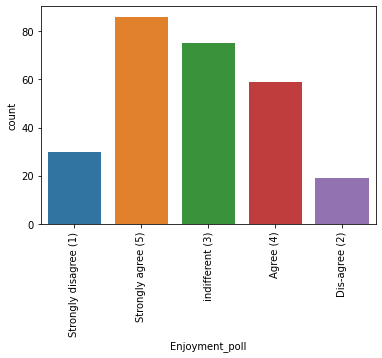

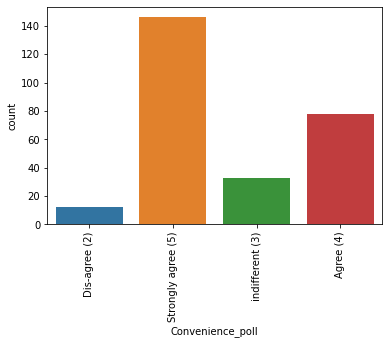

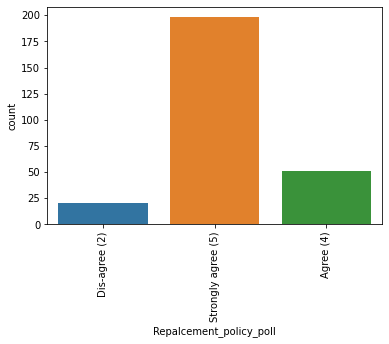

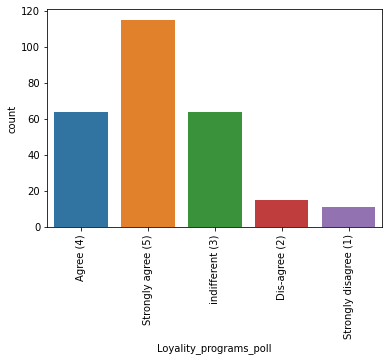

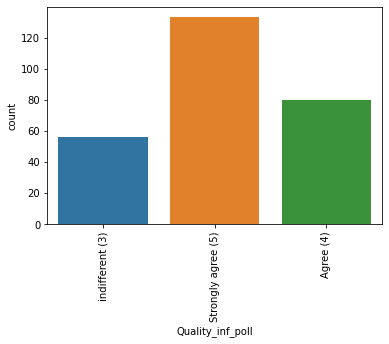

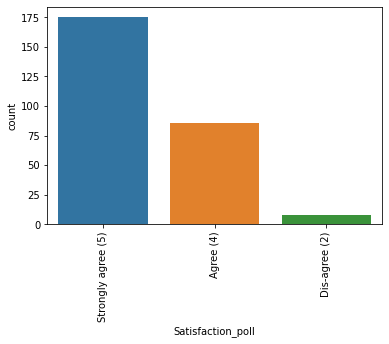

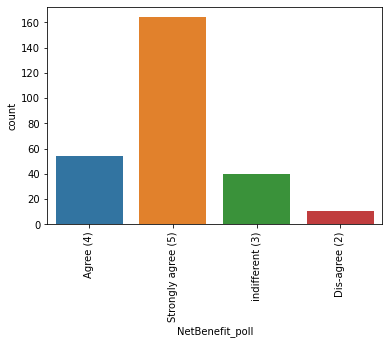

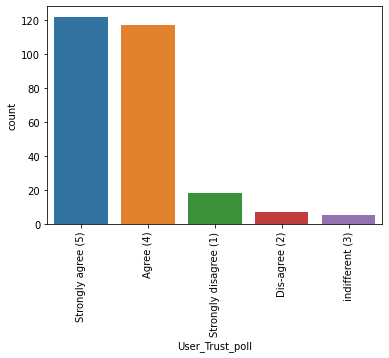

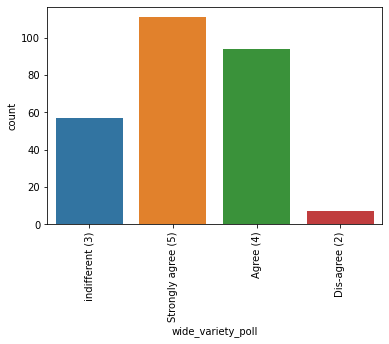

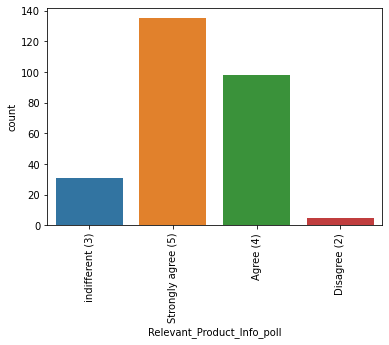

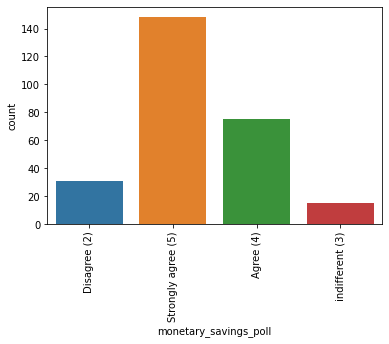

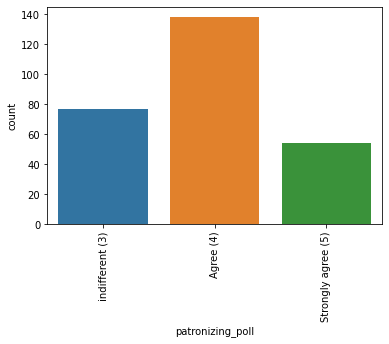

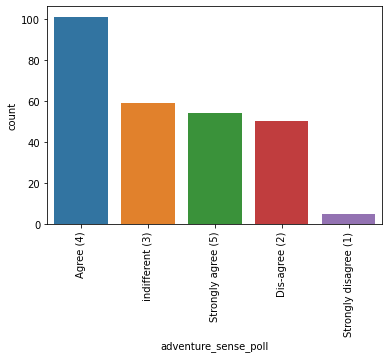

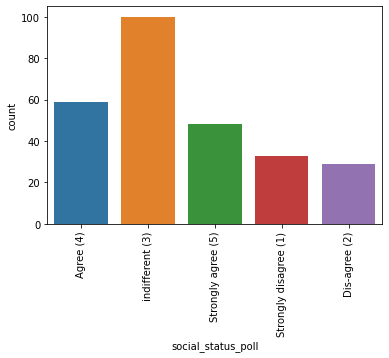

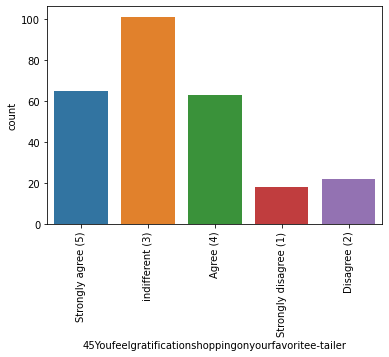

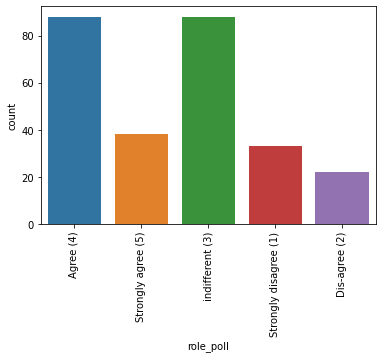

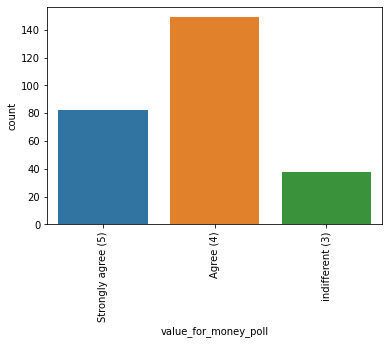

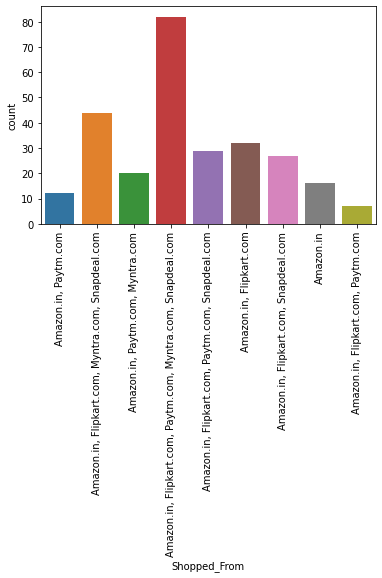

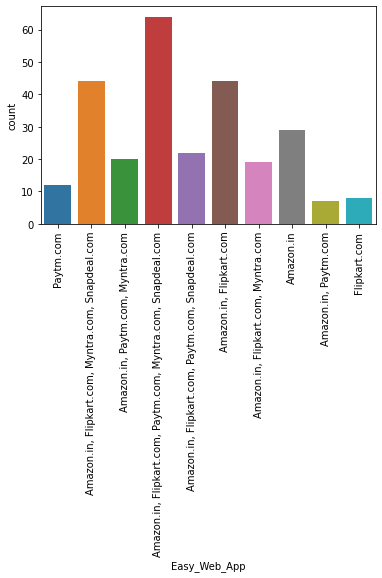

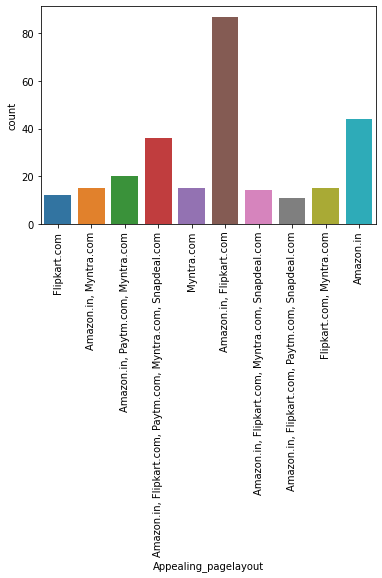

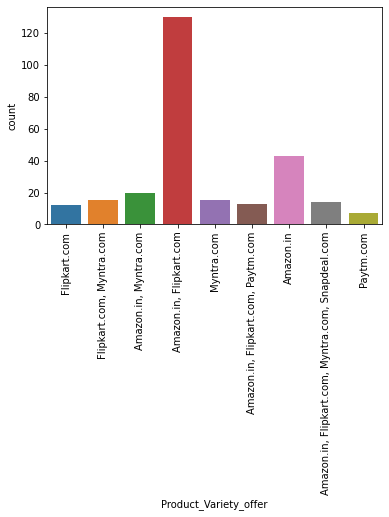

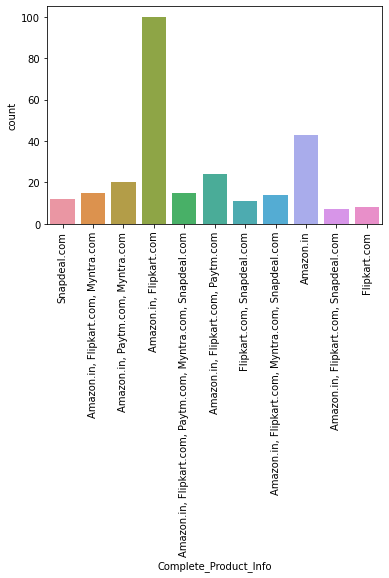

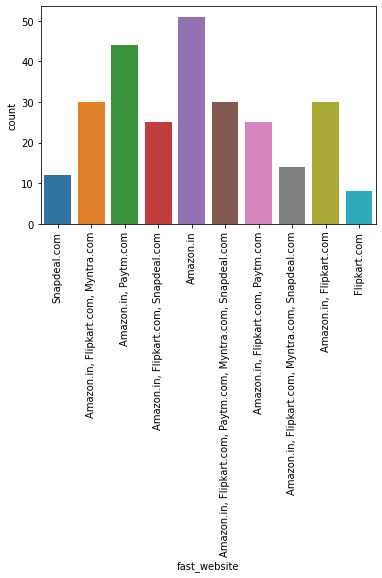

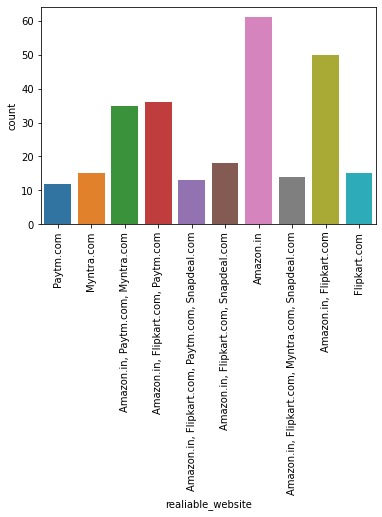

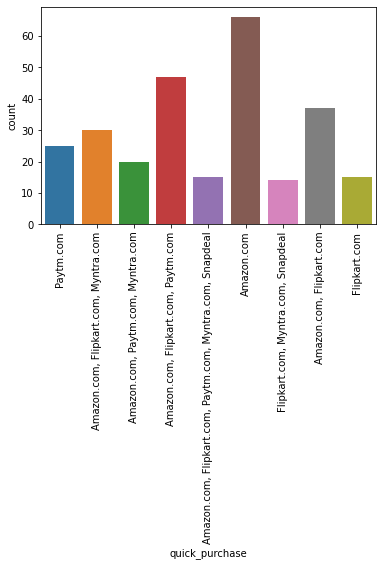

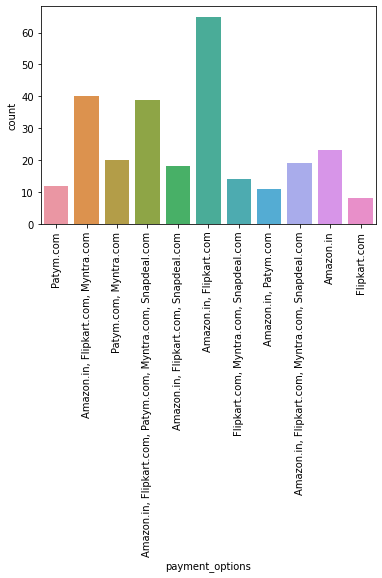

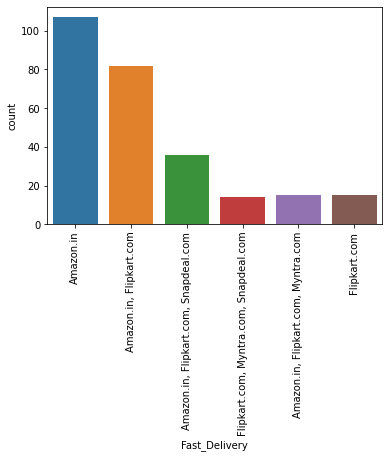

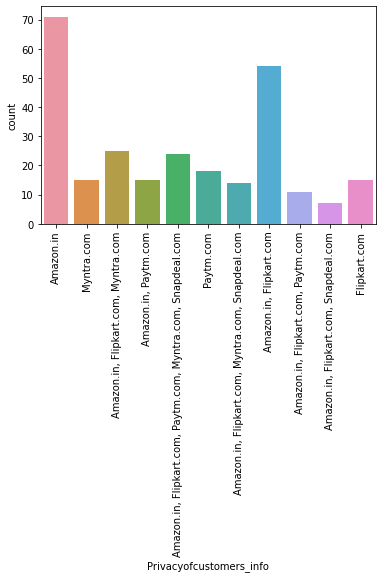

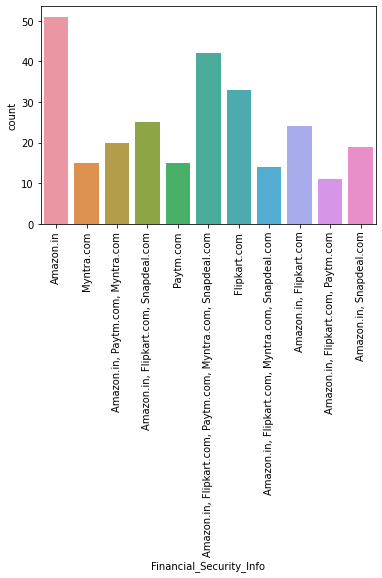

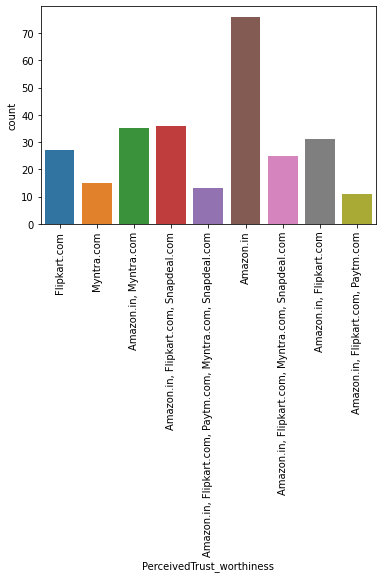

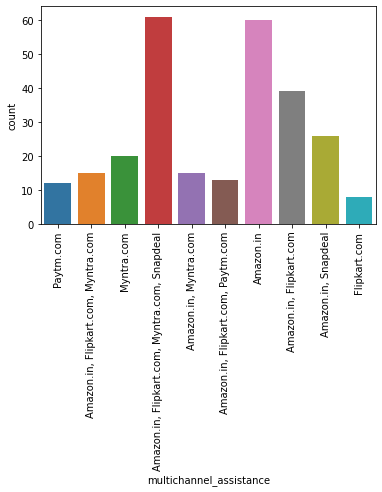

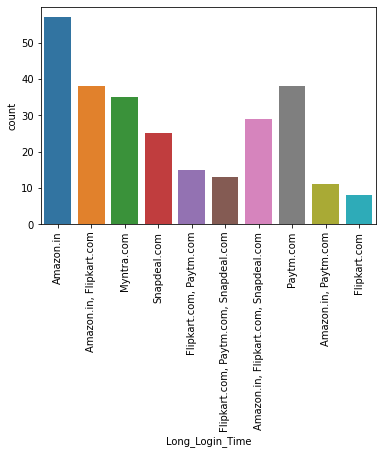

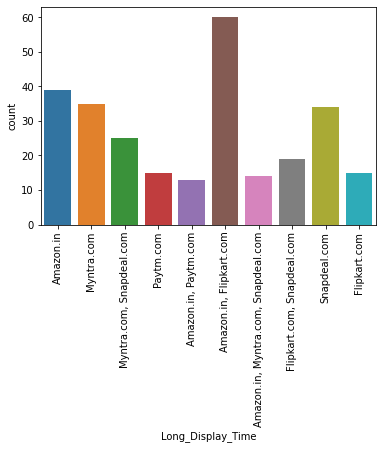

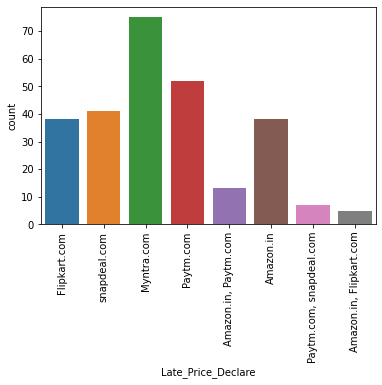

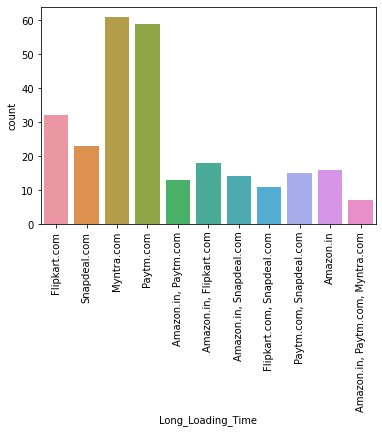

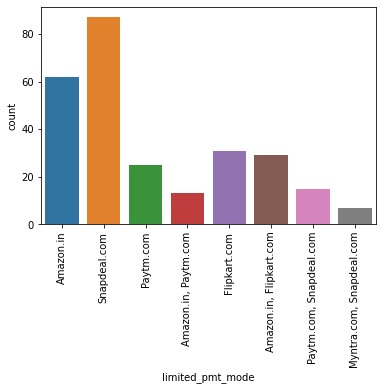

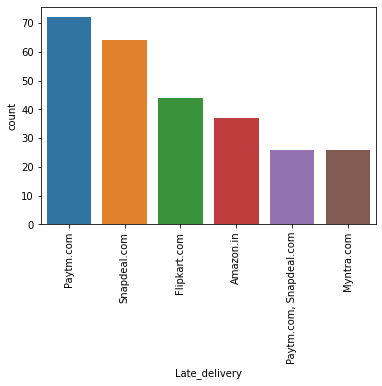

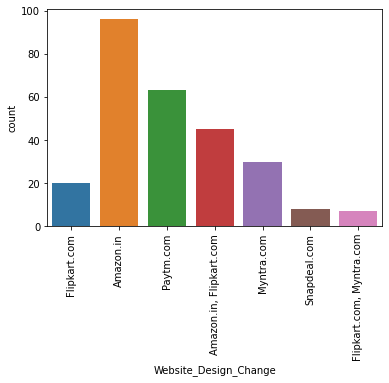

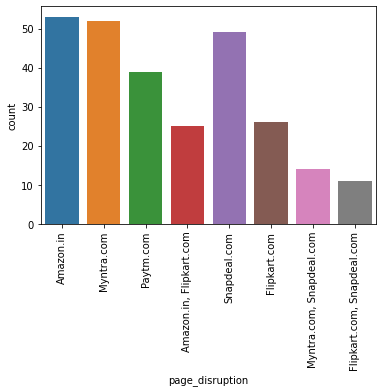

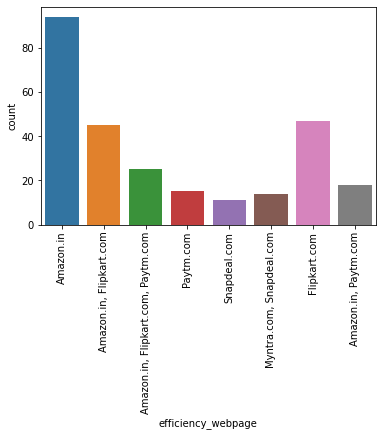

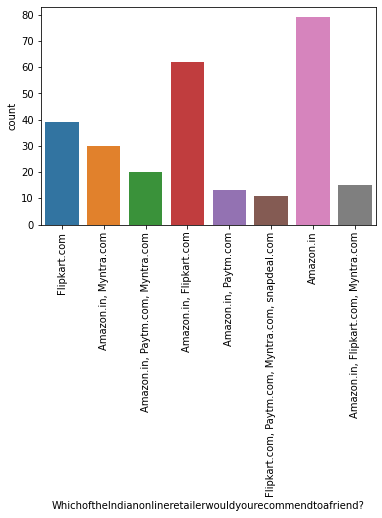

In [41]:
for i in df.columns:
    sns.countplot(df[i])
    plt.xticks(rotation = 90)
    plt.show()

observations:-
     Most users have Windows OS and least customers use iOS. Most of the customers use Google Chrome as web browser and least customers use Opera browser. Most users use the Search engine to visit the website the first time. Most users used the search engine to login followed by the application. Most of the users have explored the website more than 15 times and least customers about 1 time. Debit/Credit card is most used payment mode and least used payment mode is E-wallets. Most customers use different platforms to shop as they got better alternative offers and very few customers lost trust in the application. Reason for abandon for most of the customers is that they get better alternative offer and for very few customer,reason for abandon is no preffered mode of payment. Most of the customers like Amazon interms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal. The count is high for the customers who belive that Amazon keeps their financial information secure also the customers trusts flipkart, Myntra, Snapdeal and paytm in terms of keeping thier financial information secured. Most cutomers Strongly agree that it is easy to navigate through the websites. Most customers strongly agree that the website/application loads fast. Most of the customer strongly agree that the website is user friendly, the mode of payment is convenient, and the delivery is done in a timely manner. Most customers Strongly agree that the customer support response, customer privacy, and benifits are high. Myntra and paytm late declaration of price in promotion/sales period compared than others. Myntra and paytm takes longer page loading time. Most customers strongly agree that their replacement policy is good. Most customers strongly agree that the information description is great. Most customers Strongly agree/ agree that they trust the website. Snapdeal.com has limited mode of payment on most products followed by Amazon.in. Paytm and Snapdeal provides late delivery. Most of the customers disliked change in website/Application design on amazon followed by paytm. Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal. Most of the customers believes that Amazon and flipkart website is as efficient as before. Most of the customers would like to recommend amazon retailer to a friend followed by flipkart. Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period. Myntra and paytm have late declaration of price in promotion/sales period compared to others. Customers recommend more for Amazon.

Bi-Variate Analysis

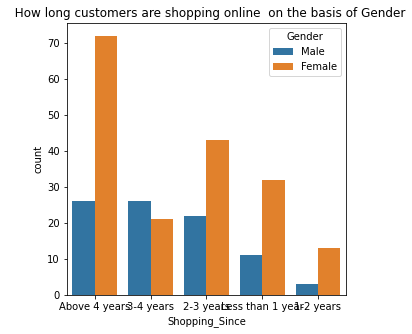

In [42]:
plt.figure(figsize=[5,5])
plt.title('  How long customers are shopping online  on the basis of Gender')
sns.countplot(df['Shopping_Since'], hue=df['Gender'])
plt.show()

Female customers shop online more than males, and shopping since 4 years and above.

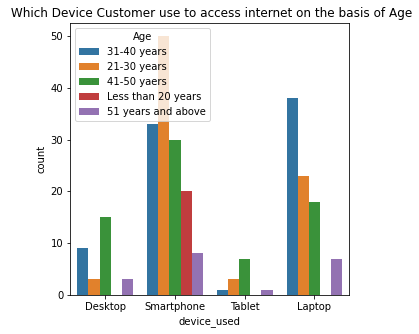

In [43]:
plt.figure(figsize=[5,5])
plt.title(' Which Device Customer use to access internet on the basis of Age')
sns.countplot(df['device_used'], hue=df['Age'])
plt.show()

21-30 Age group use Smartphone for shopping online followed by 31-40 age group.

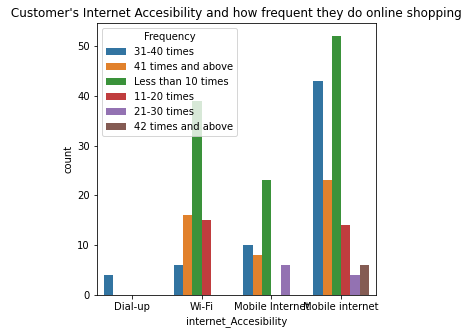

In [44]:
plt.figure(figsize=[5,5])
plt.title(" Customer's Internet Accesibility and how frequent they do online shopping ")
sns.countplot(df['internet_Accesibility'], hue=df['Frequency'])
plt.legend(loc='upper left',title='Frequency')
plt.show()

Most of the customers use Mobile Internet to do online shopping and frequecy of most of the customers is less than 10 times in a year.

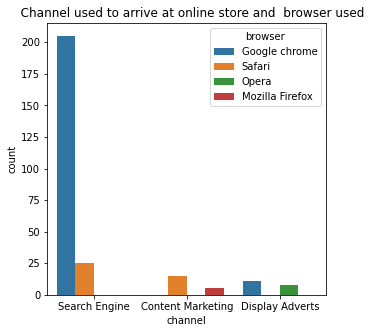

In [45]:
plt.figure(figsize=[5,5])
plt.title("   Channel used to arrive at online store and  browser used")
sns.countplot(df['channel'], hue=df['browser'])
plt.legend(loc='upper right',title='browser')
plt.show()

Most of the customers used Search Engine as Channel and browser used is Chrome.

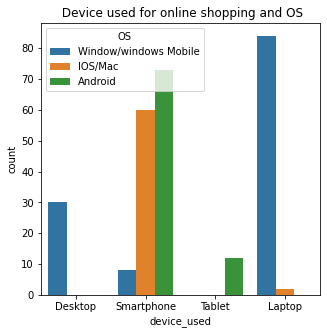

In [47]:
plt.figure(figsize=[5,5])
plt.title(" Device used for online shopping and OS")
sns.countplot(df['device_used'], hue=df['OS'])
plt.legend(loc='upper left',title='OS')
plt.show()

Most of the customers use windows as OS with device laptop.

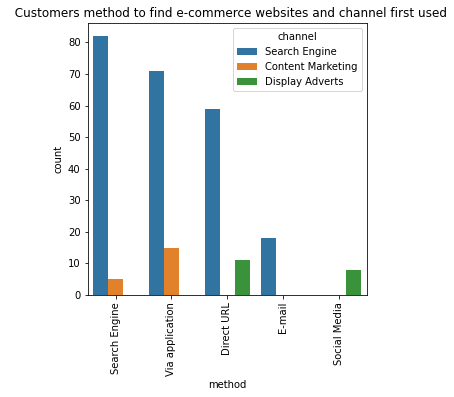

In [48]:
plt.figure(figsize=[5,5])
plt.title("  Customers method to find e-commerce websites and channel first used")
sns.countplot(df['method'], hue=df['channel'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='channel')
plt.show()

Search Engion is the method and Search Engine is the channel first used to arrive at the online retail store.

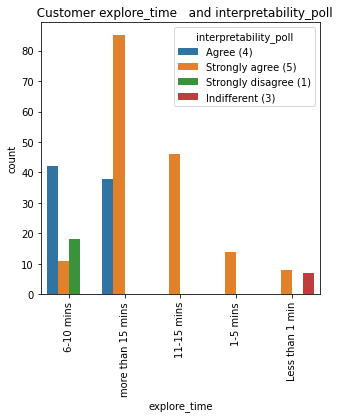

In [49]:
plt.figure(figsize=[5,5])
plt.title("  Customer explore_time   and interpretability_poll")
sns.countplot(df['explore_time'], hue=df['interpretability_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='interpretability_poll')
plt.show()

Most of the customers explore more than 15 minutes to make a decision and agree that contents on the retailer website is easy to understand.

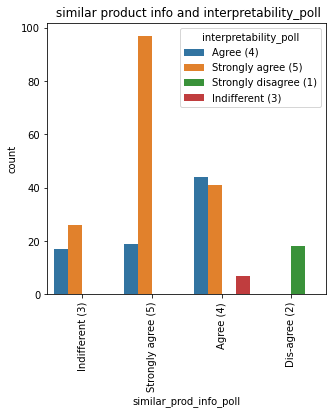

In [50]:
plt.figure(figsize=[5,5])
plt.title(" similar product info and interpretability_poll")
sns.countplot(df['similar_prod_info_poll'], hue=df['interpretability_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='interpretability_poll')
plt.show()

Customers strongly agree that contents on websites are easy to understand and Information on similar product

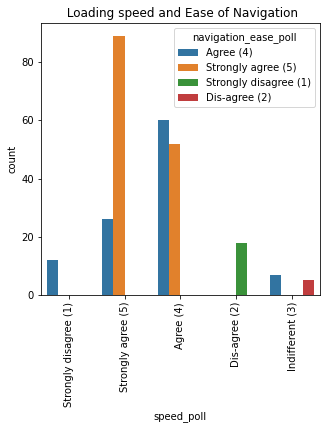

In [52]:
plt.figure(figsize=[5,5])
plt.title(" Loading speed and Ease of Navigation")
sns.countplot(df['speed_poll'], hue=df['navigation_ease_poll'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='navigation_ease_poll')
plt.show()

Most of the Customers strongly agree that e-commerce websites loading and processing speed and ease in navigation are good.

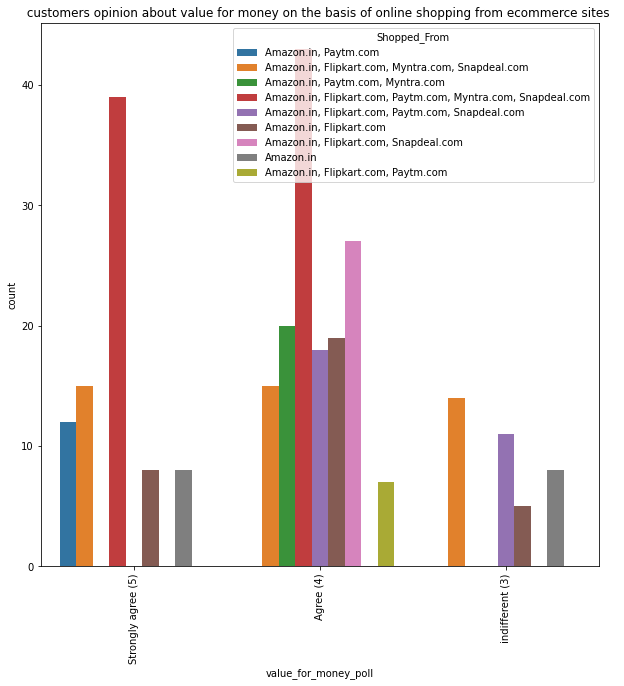

In [54]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about value for money on the basis of online shopping from ecommerce sites  ")
sns.countplot(df['value_for_money_poll'], hue=df['Shopped_From'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Shopped_From')
plt.show()

More of the customers agree that online shopping from Amazon,Flipkart,Paytm,Myntra and snapdeal offer products which gives value for money.

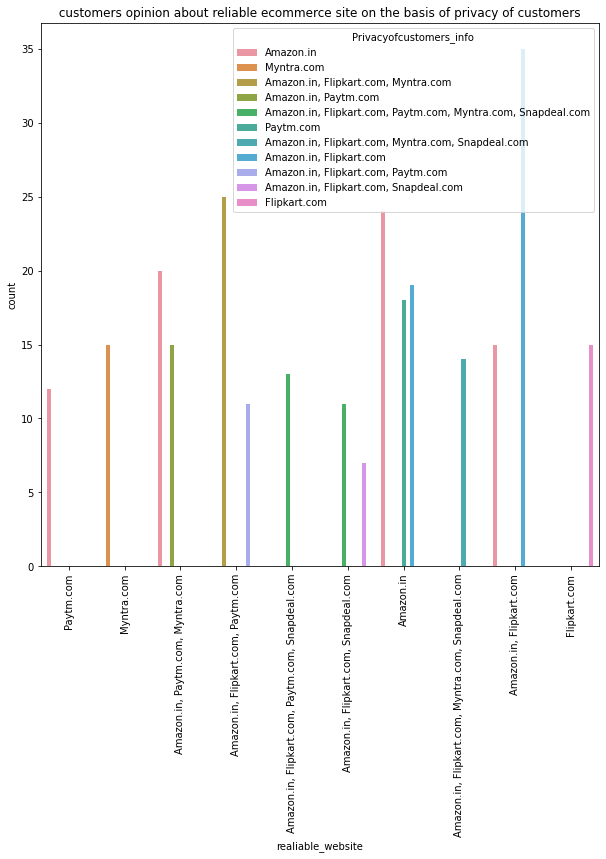

In [55]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about reliable ecommerce site on the basis of privacy of customers ")
sns.countplot(df['realiable_website'], hue=df['Privacyofcustomers_info'])
plt.xticks(rotation=90)
plt.legend(loc='upper right',title='Privacyofcustomers_info')
plt.show()

Most customers beleive that Amazon and FlipKart are reliable websites,they provide good customer privacy.

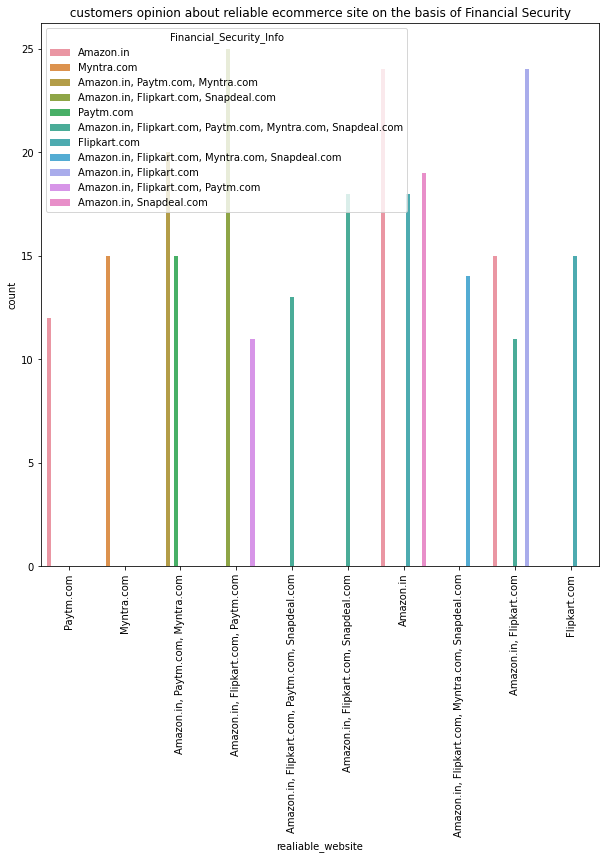

In [56]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about reliable ecommerce site on the basis of Financial Security ")
sns.countplot(df['realiable_website'], hue=df['Financial_Security_Info'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='Financial_Security_Info')
plt.show()

Most customers believe that Amazon,paytm and snapdeal provides good financial security.


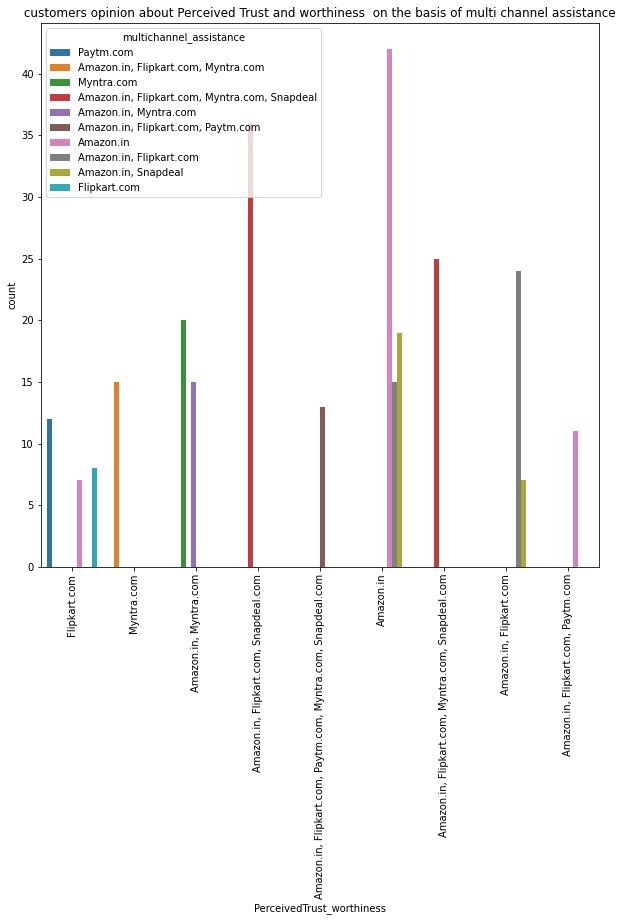

In [57]:
plt.figure(figsize=[10,10])
plt.title(" customers opinion about Perceived Trust and worthiness  on the basis of multi channel assistance ")
sns.countplot(df['PerceivedTrust_worthiness'], hue=df['multichannel_assistance'])
plt.xticks(rotation=90)
plt.legend(loc='upper left',title='multichannel_assistance')
plt.show()

Amazon has received most of the customers trust by providing multichannel assistance.

In [59]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]=lec.fit_transform(df[i])

Label encoding

In [60]:
df.head()

,Gender,Age,City,Pincode,Shopping_Since,Frequency,internet_Accesibility,device_used,Screen_Size,OS,...,Long_Login_Time,Long_Display_Time,Late_Price_Declare,Long_Loading_Time,limited_pmt_mode,Late_delivery,Website_Design_Change,page_disruption,efficiency_webpage,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?
0,1,1,2,110009,3,2,0,0,3,2,...,0,0,3,5,0,3,2,0,0,6
1,0,0,2,110030,3,3,3,2,0,1,...,1,6,7,10,7,5,0,4,1,3
2,0,0,4,201308,2,3,1,2,2,0,...,7,6,4,7,0,3,5,6,0,5
3,1,0,6,132001,2,5,1,2,2,1,...,9,7,4,8,5,3,1,1,2,1
4,0,0,0,530068,1,0,3,2,0,1,...,5,8,5,8,7,3,0,7,6,3


outliers

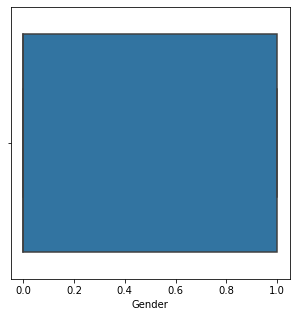

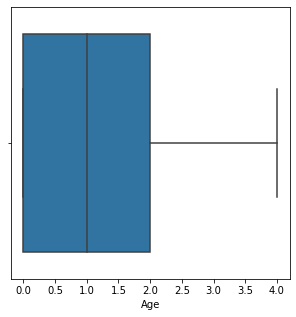

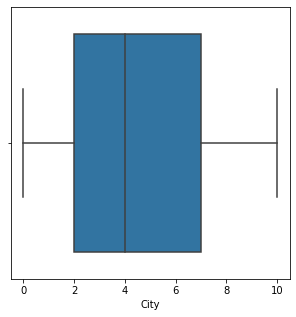

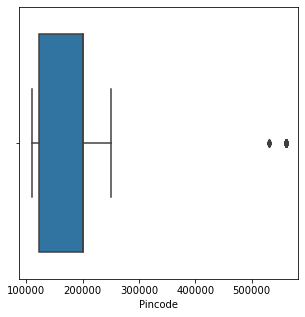

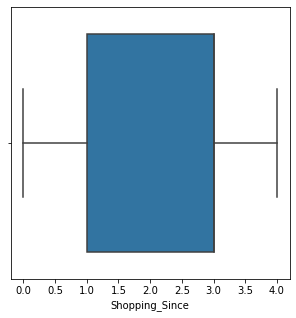

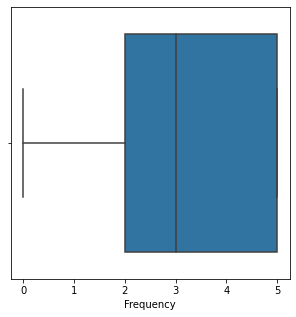

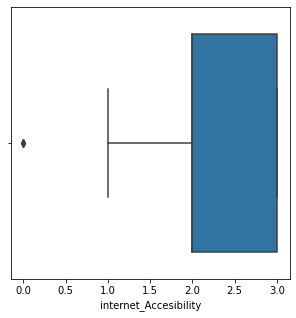

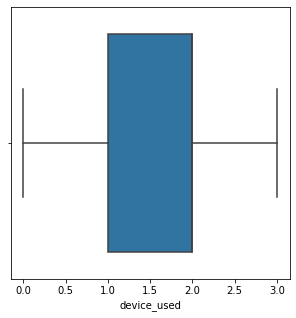

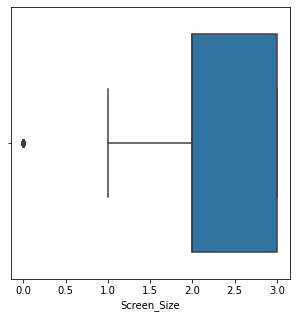

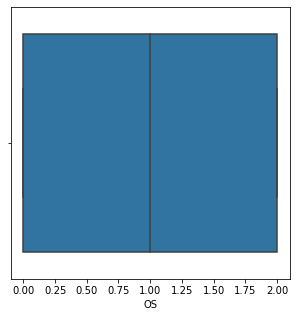

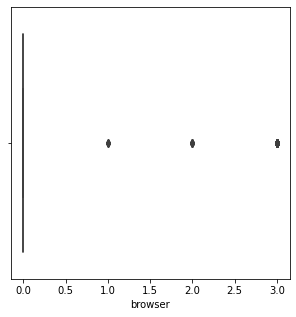

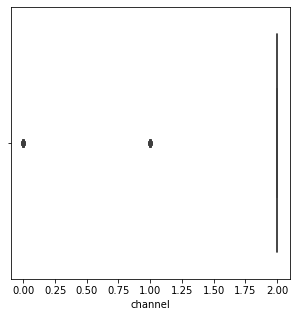

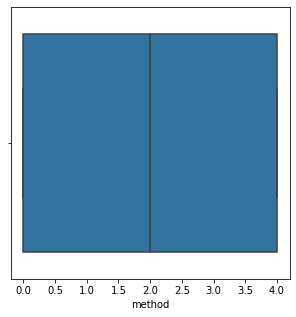

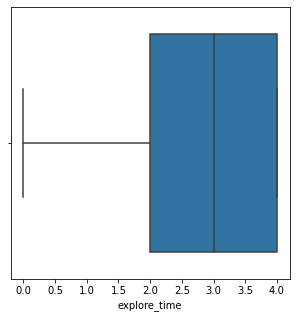

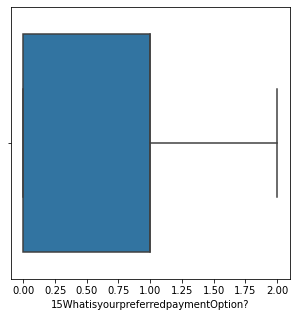

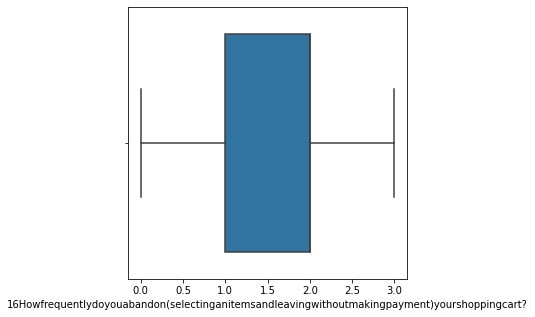

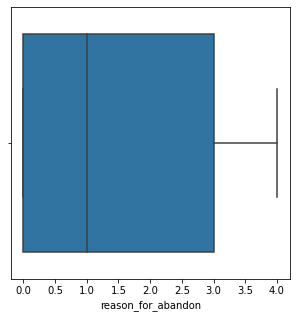

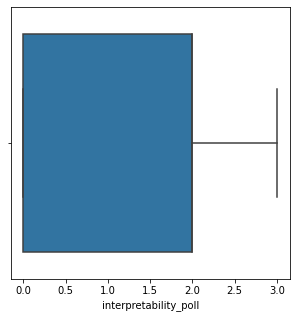

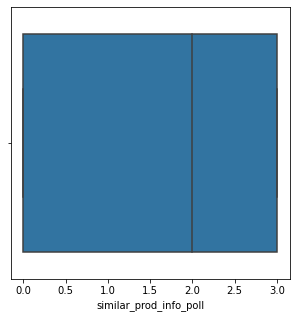

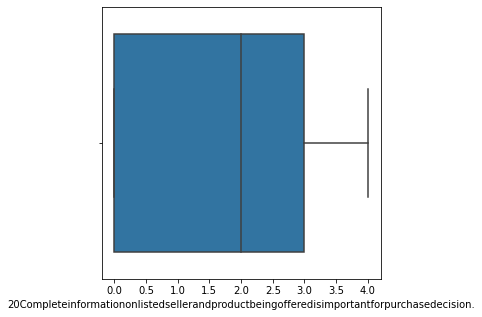

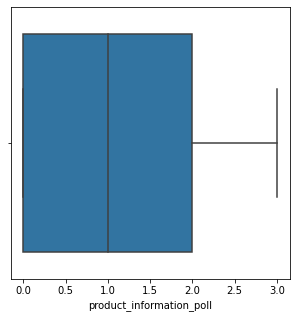

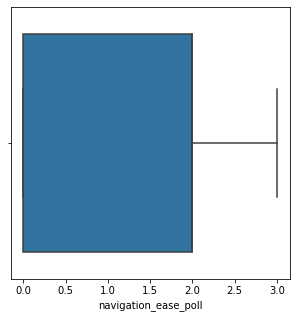

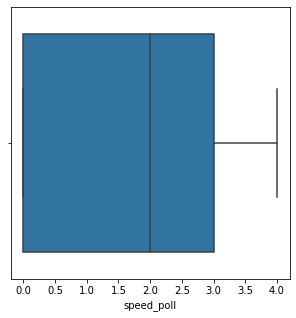

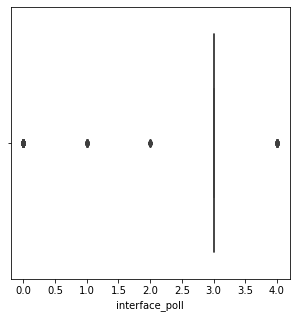

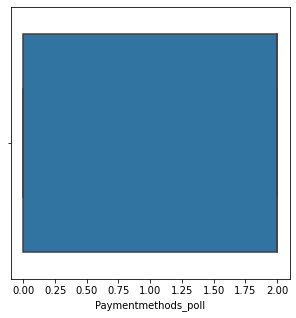

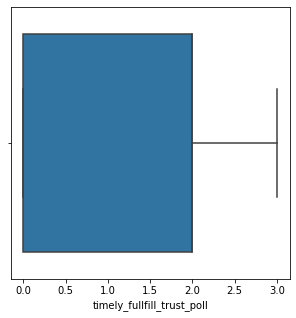

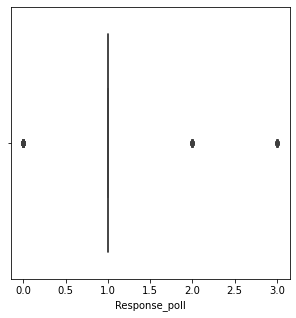

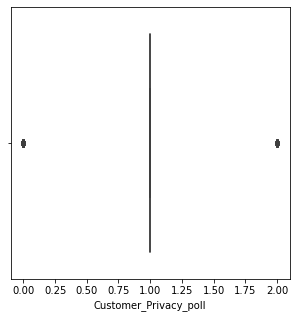

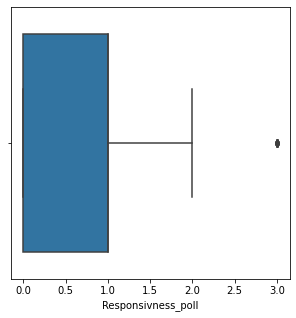

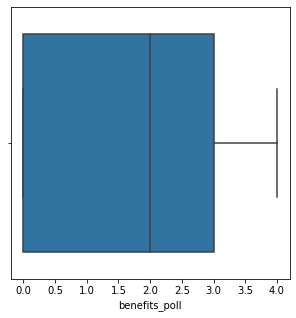

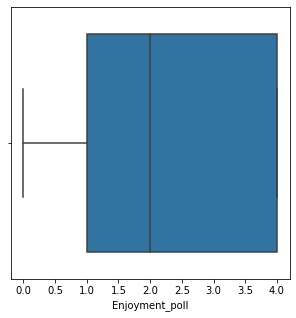

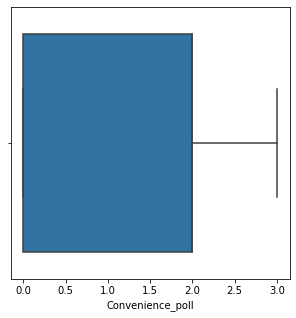

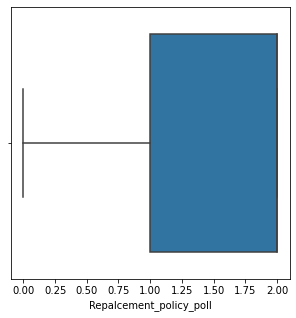

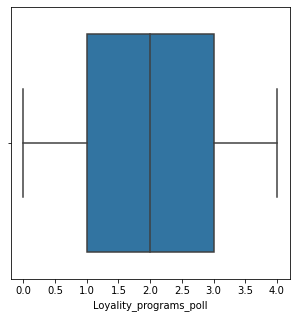

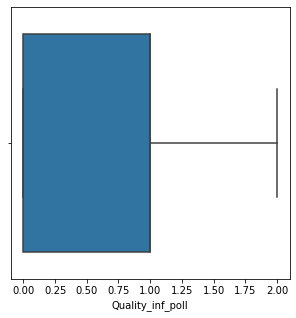

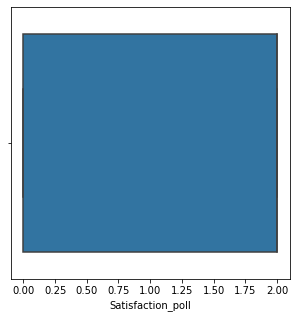

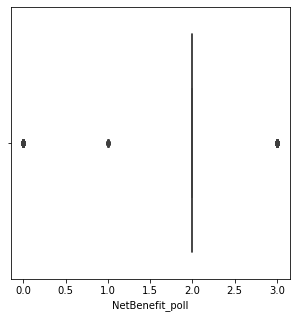

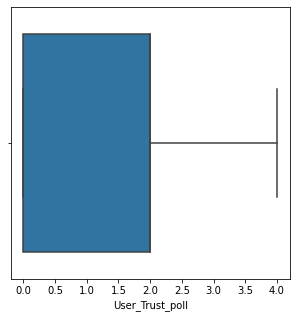

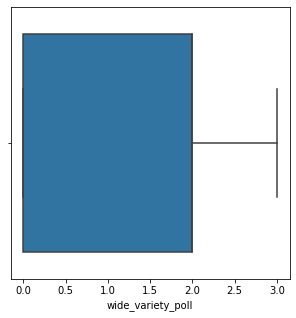

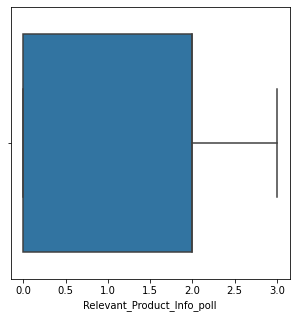

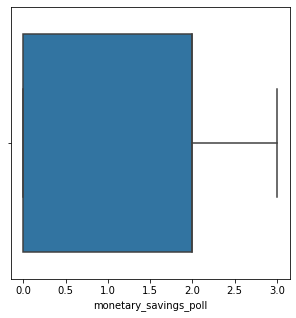

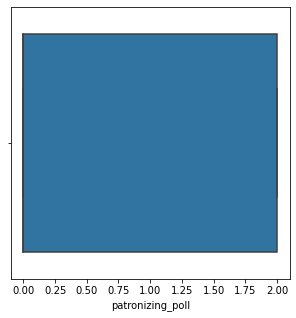

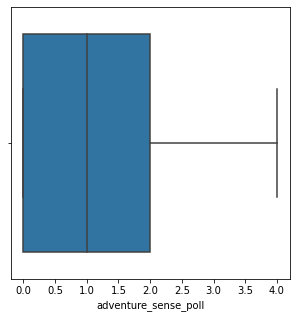

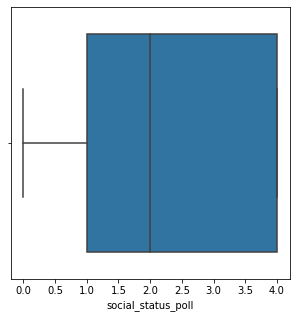

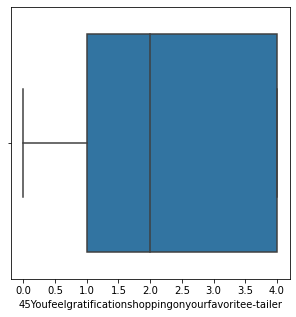

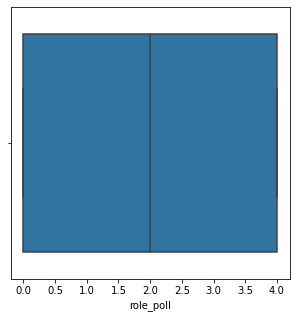

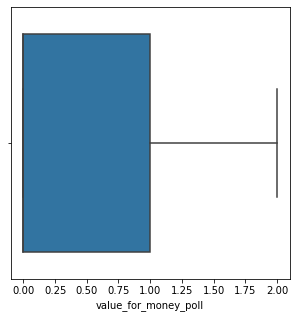

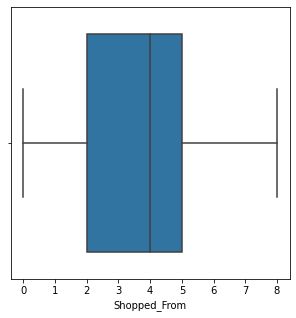

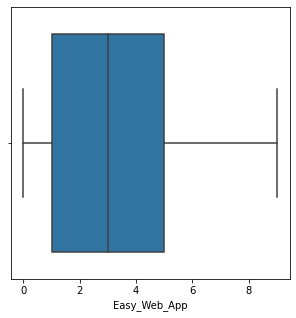

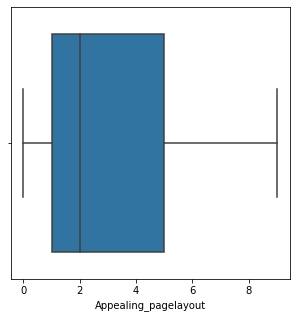

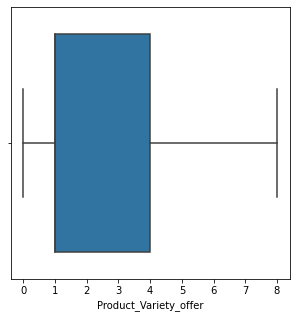

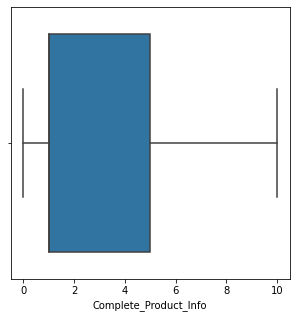

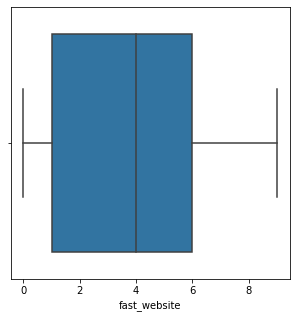

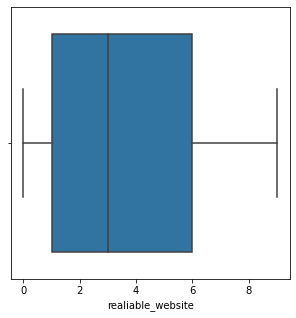

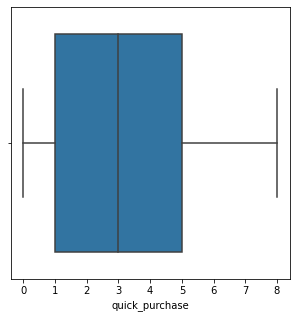

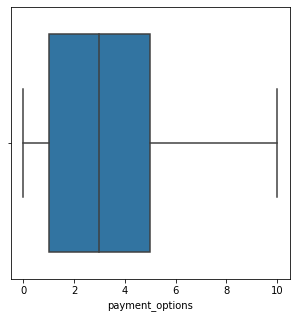

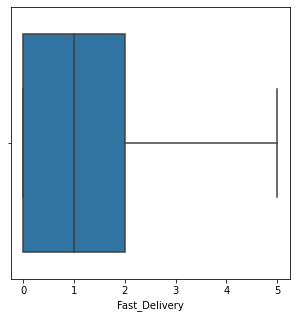

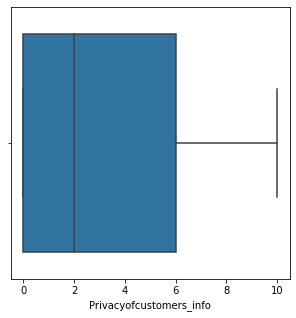

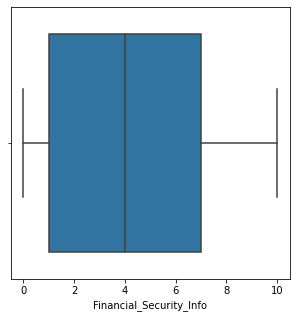

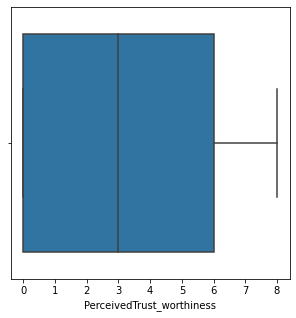

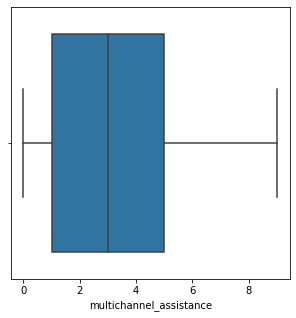

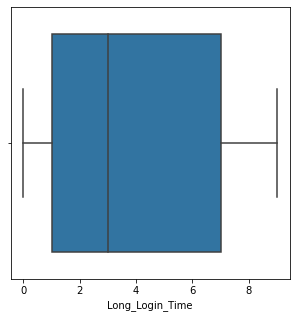

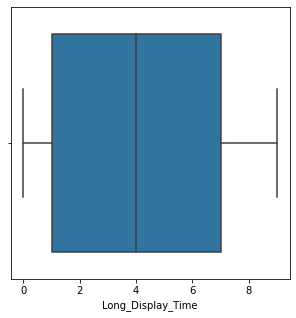

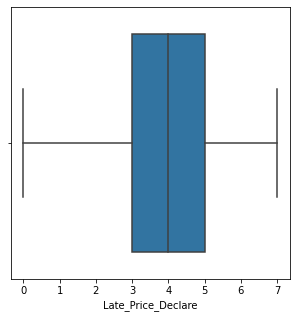

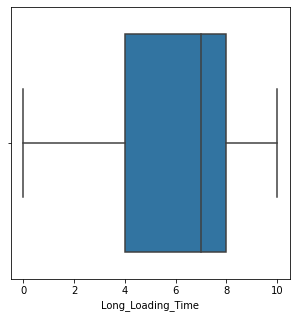

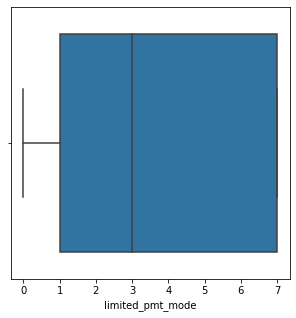

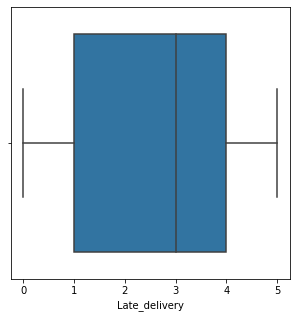

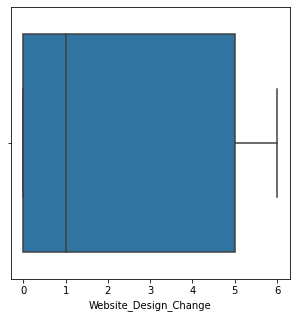

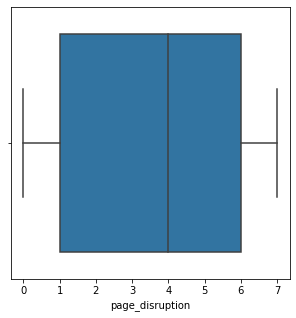

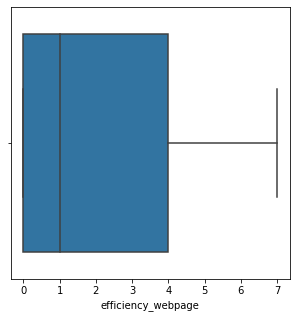

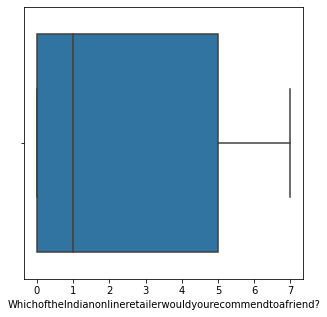

In [61]:
for i in df.columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[i])
    plt.show()

columns have outliers:

Pincode Screen_Size browser channel interface_poll Respose_poll Customer_Privacy_Poll Responsivness_poll NetBenefit_poll We do not need to remove the outliers from the above columns as they are all categorical columns.

skewness

In [62]:
df.skew()

Gender                                                       0.741028
Age                                                          0.680987
City                                                         0.313729
Pincode                                                      1.748322
Shopping_Since                                              -0.276968
                                                               ...   
Late_delivery                                               -0.147702
Website_Design_Change                                        0.354163
page_disruption                                             -0.100608
efficiency_webpage                                           0.662084
WhichoftheIndianonlineretailerwouldyourecommendtoafriend?    0.583614
Length: 71, dtype: float64

In [63]:
df.corr()

,Gender,Age,City,Pincode,Shopping_Since,Frequency,internet_Accesibility,device_used,Screen_Size,OS,...,Long_Login_Time,Long_Display_Time,Late_Price_Declare,Long_Loading_Time,limited_pmt_mode,Late_delivery,Website_Design_Change,page_disruption,efficiency_webpage,WhichoftheIndianonlineretailerwouldyourecommendtoafriend?
Gender,1.000000,0.046169,0.080912,-0.260365,-0.057096,0.077876,-0.309029,0.061673,0.028794,-0.019243,...,-0.101925,-0.228744,-0.061374,0.008289,-0.158941,0.060838,-0.164818,-0.256638,0.055663,-0.003372
Age,0.046169,1.000000,0.113712,-0.120704,-0.087847,0.309575,0.255594,0.022383,-0.006101,-0.048087,...,-0.281877,-0.095850,-0.064601,-0.128064,-0.198658,-0.156173,-0.134558,-0.018825,-0.008582,-0.135263
City,0.080912,0.113712,1.000000,-0.416597,-0.138329,0.173871,-0.010436,0.020650,0.199296,-0.051642,...,-0.065450,-0.115453,-0.293441,-0.104340,-0.263921,-0.123369,0.000427,0.019167,0.007117,-0.142123
Pincode,-0.260365,-0.120704,-0.416597,1.000000,-0.090049,-0.263685,0.005511,-0.004980,-0.211198,-0.053901,...,-0.085194,0.089605,-0.070046,-0.026817,0.054532,-0.078660,-0.058715,0.039936,0.037662,-0.045388
Shopping_Since,-0.057096,-0.087847,-0.138329,-0.090049,1.000000,0.013315,0.226883,-0.125240,0.139924,0.274201,...,0.154763,-0.063386,0.305533,0.086616,0.159591,0.218641,0.220347,0.025919,-0.024316,0.136106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Late_delivery,0.060838,-0.156173,-0.123369,-0.078660,0.218641,-0.130651,0.101297,-0.104665,0.048533,0.397953,...,0.268484,0.365030,0.598200,0.797480,0.593167,1.000000,0.329965,0.475654,0.247471,0.428419
Website_Design_Change,-0.164818,-0.134558,0.000427,-0.058715,0.220347,0.007841,0.147770,-0.052146,0.418180,0.059894,...,0.370649,0.152655,0.035417,0.225618,0.214103,0.329965,1.000000,0.436573,-0.189925,0.423877
page_disruption,-0.256638,-0.018825,0.019167,0.039936,0.025919,-0.127148,0.349813,0.084876,-0.065658,0.111380,...,0.274454,0.603750,0.332032,0.614528,0.506431,0.475654,0.436573,1.000000,0.363440,0.122953
efficiency_webpage,0.055663,-0.008582,0.007117,0.037662,-0.024316,-0.124076,0.266932,0.333868,-0.100462,-0.128611,...,0.122555,-0.010967,0.123087,0.319264,0.275338,0.247471,-0.189925,0.363440,1.000000,0.252154


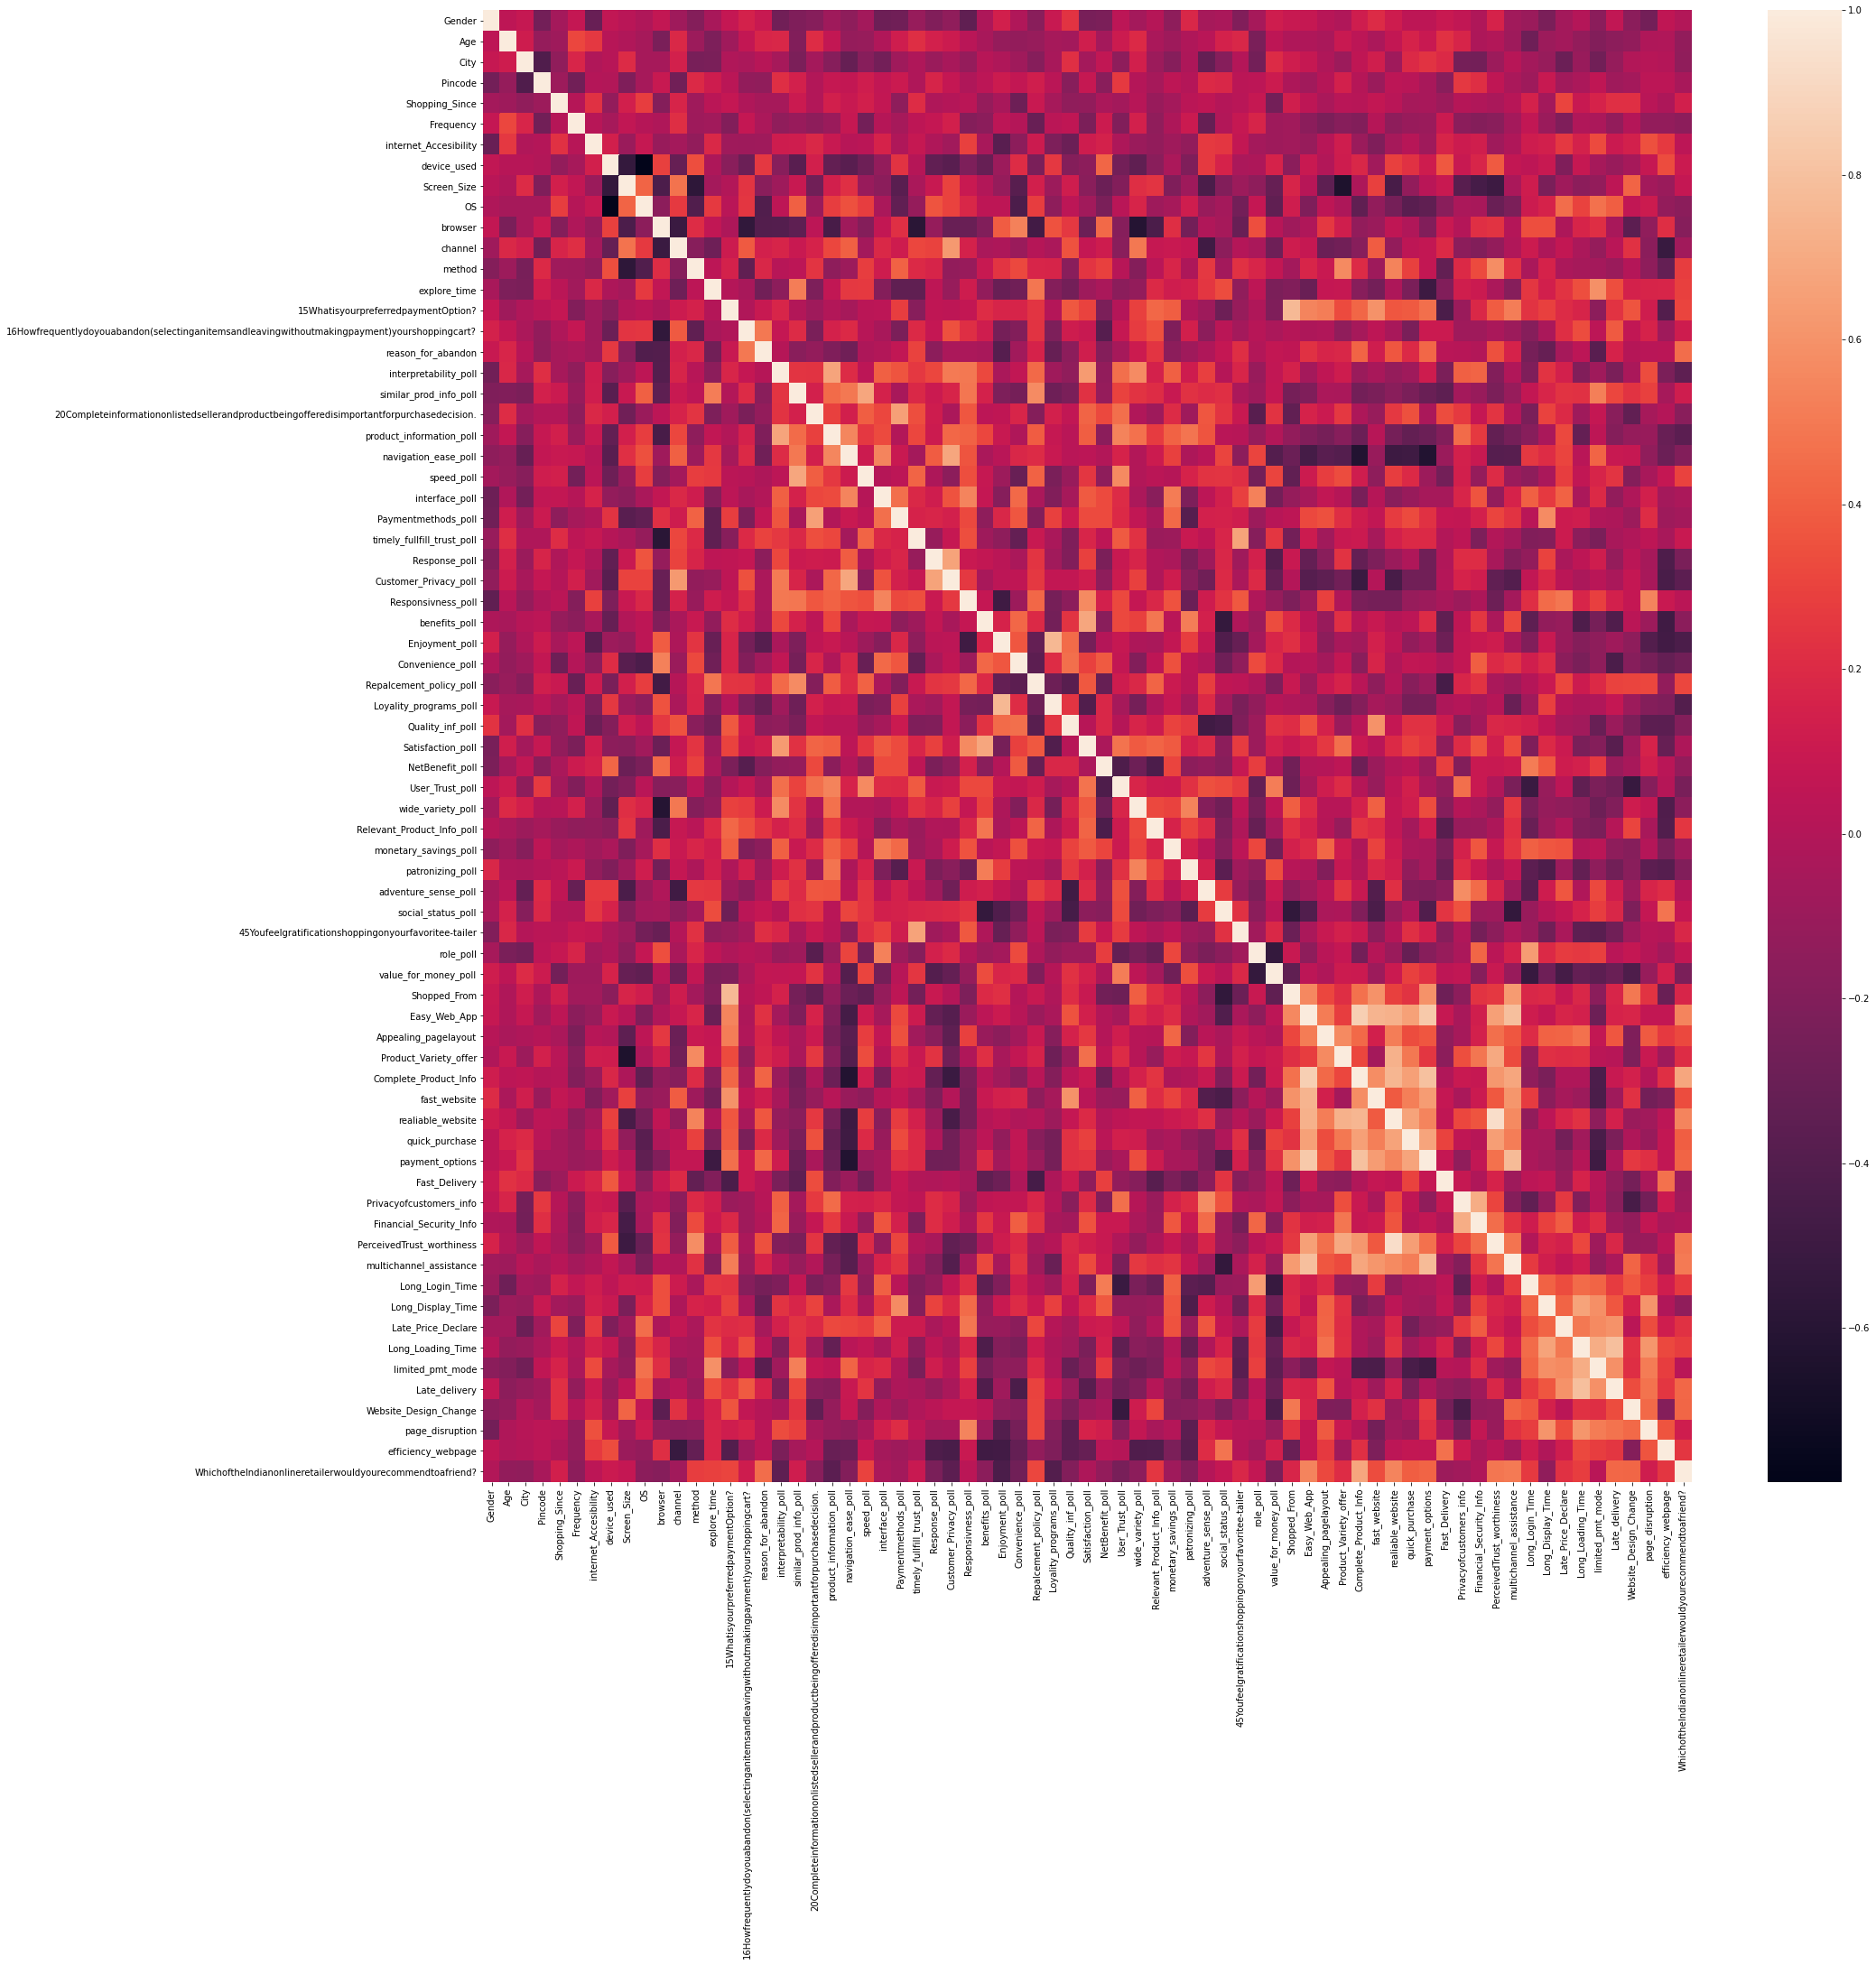

In [67]:
plt.figure(figsize = (30,30))
corr = df.corr()
sns.heatmap(corr);

1.According to my analysis,Most of the customers recommend Amazon on the basis of various factors like user friendly interface,fast delivey,payment options,customers personal and financial privacy. 2.Customers agree that e-commerce sites gives them value for money,attractive offers and several benefits. 3.It is also observed that online shopping is not trustworthy and reliable to some customers due to lack of trust. 4.Most of the customers prefer to use credit/debit card to pay. 5.Customer satisfaction plays a major role in customer retention. Some important factors for customer satisfaction:- a. Discounts b. Benefits c. Timely delivery d. Good customer service e. Responsiveness f. Easy navigation g. Multi channel Assistance h. User friendly interface i. Information quality about the product j. Convinient payment methods k. Return & Replacement policy



In [69]:
corr = df.corr().unstack()
c = corr.sort_values(kind = 'quicksort')
c[c.values > 0.7].drop_duplicates()

Financial_Security_Info  Privacyofcustomers_info                0.709004
limited_pmt_mode         Long_Loading_Time                      0.712607
realiable_website        Product_Variety_offer                  0.730907
Easy_Web_App             realiable_website                      0.731459
                         fast_website                           0.747567
Complete_Product_Info    realiable_website                      0.751957
Loyality_programs_poll   Enjoyment_poll                         0.761451
Shopped_From             15WhatisyourpreferredpaymentOption?    0.767374
multichannel_assistance  payment_options                        0.769993
Easy_Web_App             multichannel_assistance                0.791192
Long_Loading_Time        Late_delivery                          0.797480
Complete_Product_Info    payment_options                        0.801683
Easy_Web_App             payment_options                        0.834385
Complete_Product_Info    Easy_Web_App              

The top features which are correlated are shown above.